# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [1]:
# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Loading the dataset

In [2]:
# read the data
df = pd.read_csv("BankChurners.csv")

In [3]:
# Let's also create a copy, just in case we want to work out look back at the original dataframe or restore from it.
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# To find the shape of the Dataframe (number of records & number of variables)
data.shape

(10127, 21)

In [5]:
# returns the first 5 rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# Now we can check the different independent features available in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# Let's list the distinct value counts for each of the columns with Object datatype.
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [8]:
# making sure there are no duplicate records
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [10]:
# Let's look at the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [11]:
# Dropping CLIENTNUM as this is only the User ID & wouldn't help in Model building
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [12]:
# Encoding Attrition Flag to 0 for existing customer & 1 for attrited customers.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

### Observations so far..
* The dataset has over 10k records having 21 attributes / features.
* 6 of the columns are having the datatype "Object", for which we would need to create dummy variables.
    * **Attrition_Flag** ---- ***Existing Customer*** (8500), ***Attrited Customer*** (1627)
	* **Gender** ---- ***F*** (5358), ***M*** (4769)
	* **Education_Level** ---- ***Uneducated*** (1487), ***High School*** (2013), ***College*** (1013), ***Graduate*** (3128), ***Post-Graduate*** (516), ***Doctorate*** (451)
	* **Marital_Status** ---- ***Single*** (3943), ***Married*** (4687), ***Divorced*** (748)
	* **Income_Category** ---- ***abc*** (1112), ***Less than 40K*** (3561), ***40K - 60K*** (1790), ***60K - 80K*** (1402), ***80K - 120K*** (1535), ***120K +***  (727)
	* **Card_Category** ---- ***Blue*** (9436), ***Silver*** (555), ***Gold*** (116), ***Platinum*** (20)
* The column **Income_Category** seems to be containing the range of income for different customers. However, we can see that ***1112*** records have the value for this column as ***abc***, which doesn't seem right and we might want to replace it with NaN.
* There are no duplicated values in the dataset.
* However, we do see some missing values in **Education_Level** & **Marital_Status**. We would plan to impute the missing values at later stage before building the model on this data.
* From a quick glimpse, following columns seems to be right skewed. We can dig deeper on this during Univariate & Bivariate analysis.
    * **Credit_Limit**
    * **Avg_Open_To_Buy**
    * **Total_Trans_Amt**
    * **Total_Amt_Chng_Q4_Q1**
    * **Total_Ct_Chng_Q4_Q1**
* We can drop the **CLIENTNUM** parameter, as it is only a unique identifier for the customer and wouldn't add value to the model.
* The target variable in this dataset is the column **Attrition_Flag**, which can help us classify the customers based on whether they attrited or remained.
    * So, we can encode the target variable to ***0*** & ***1*** for better analysis.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue='body_style',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### Let's build Histograms for all Numeric columns

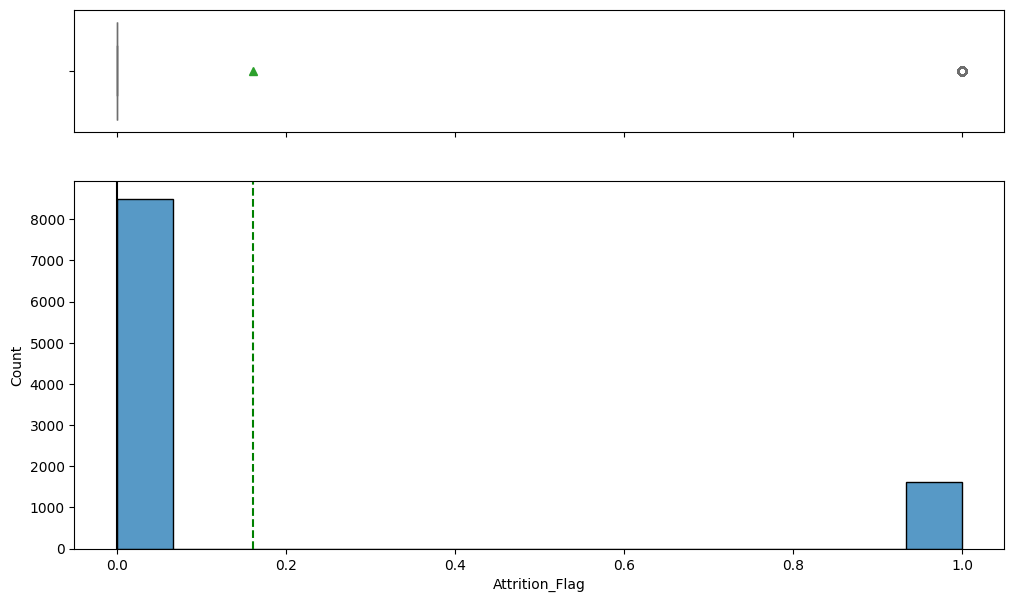

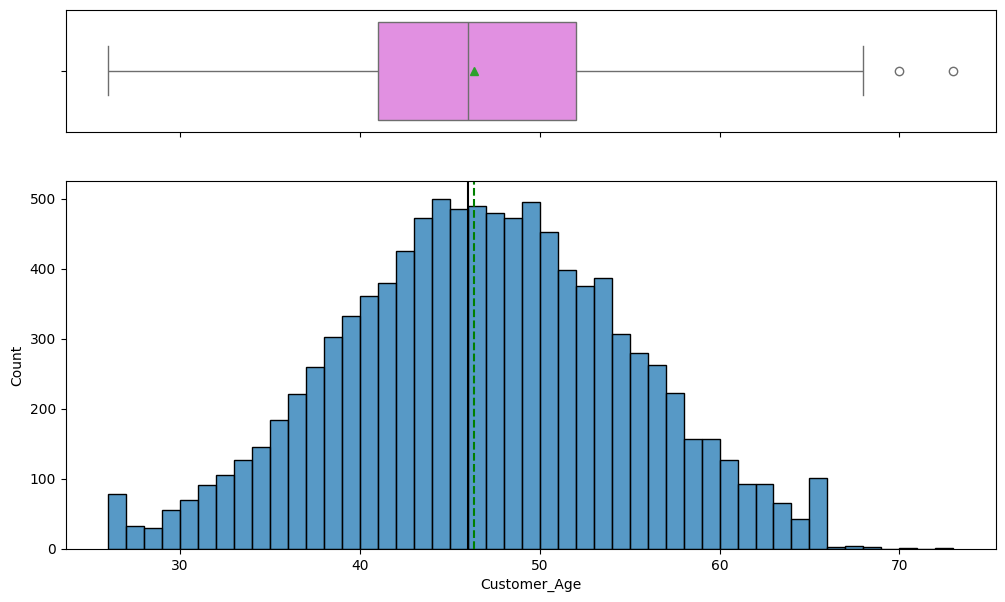

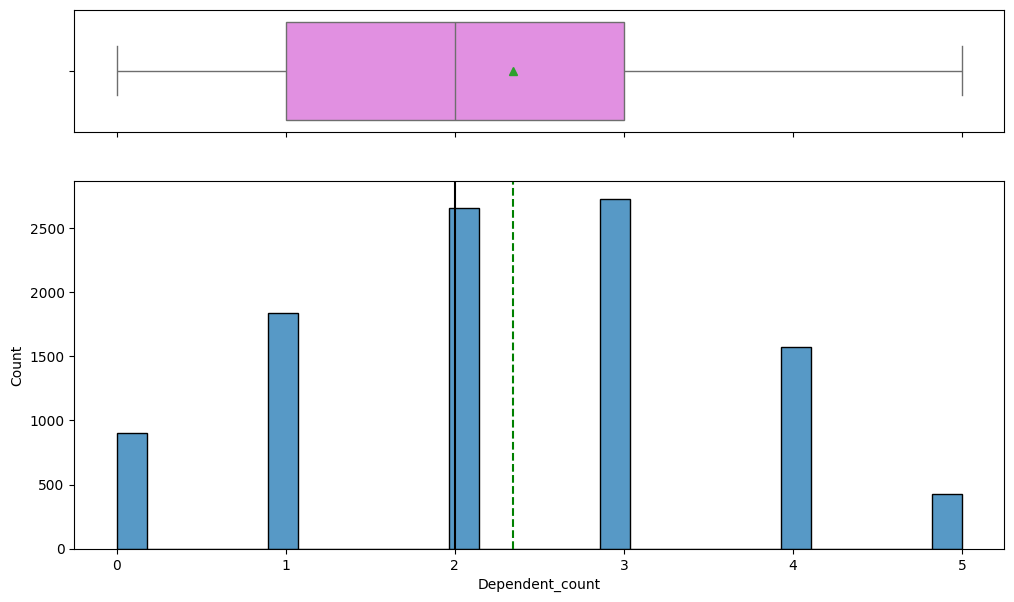

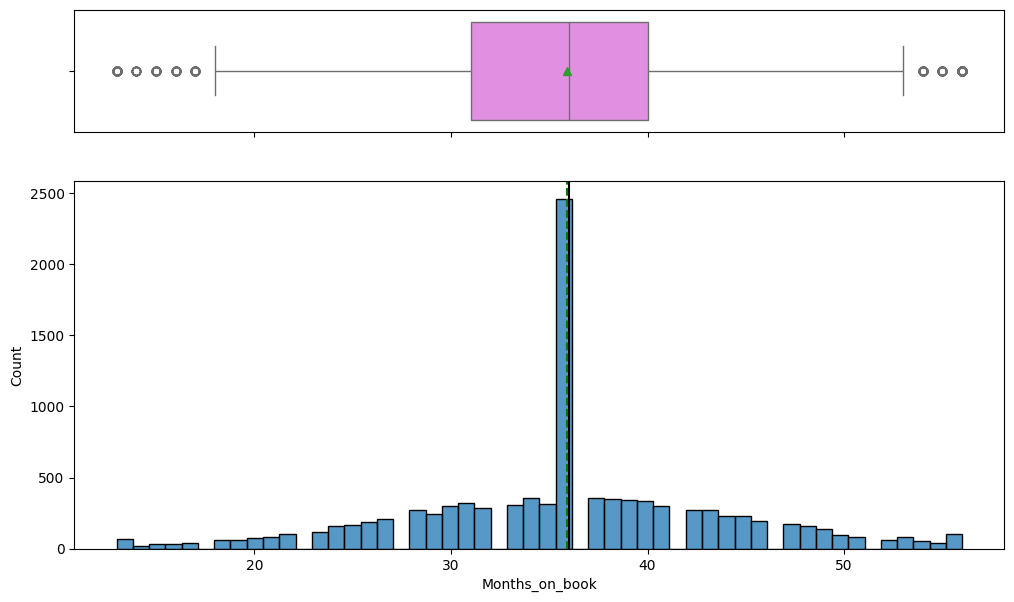

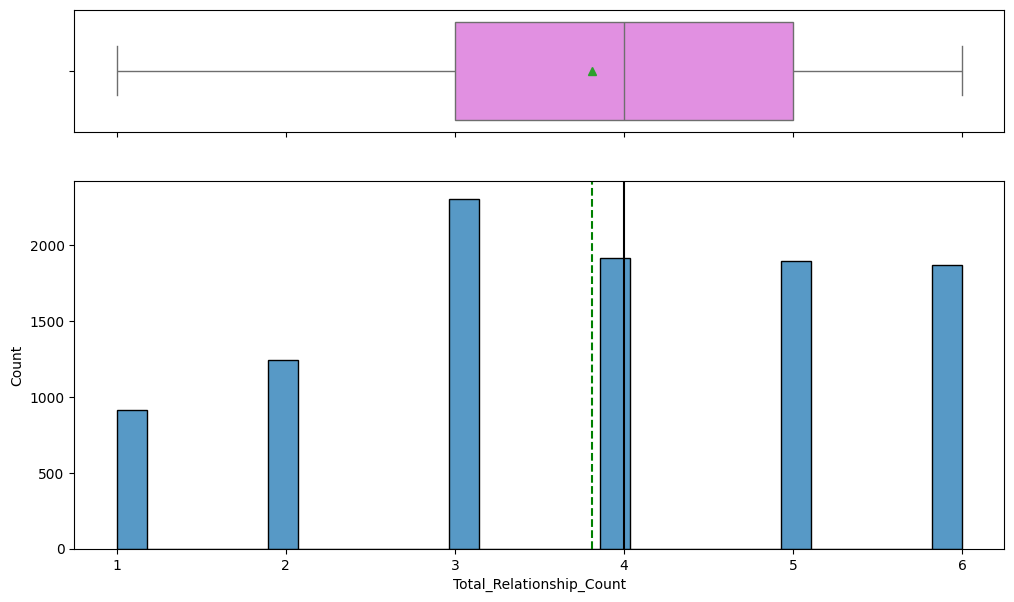

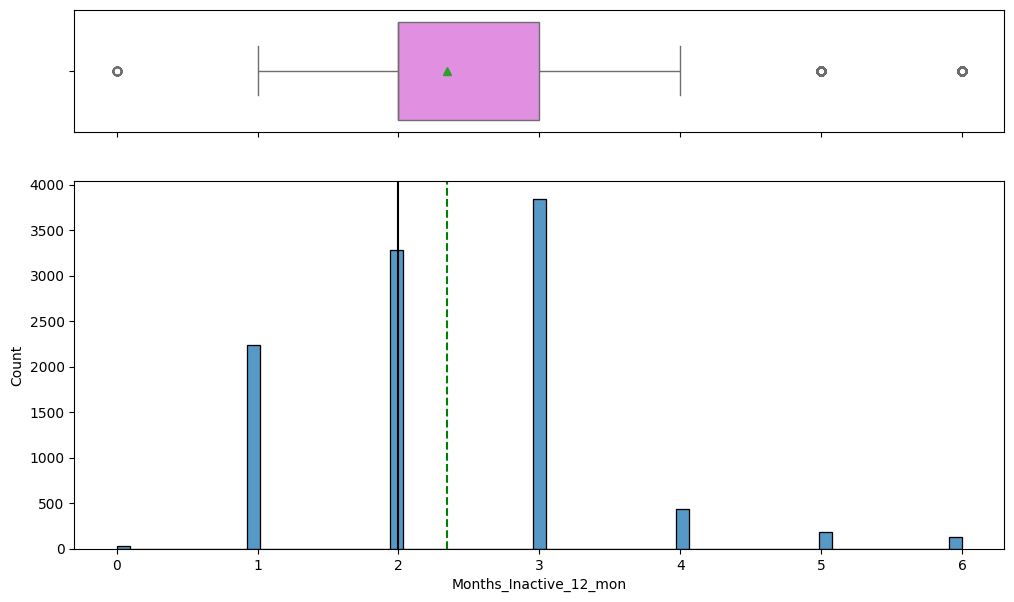

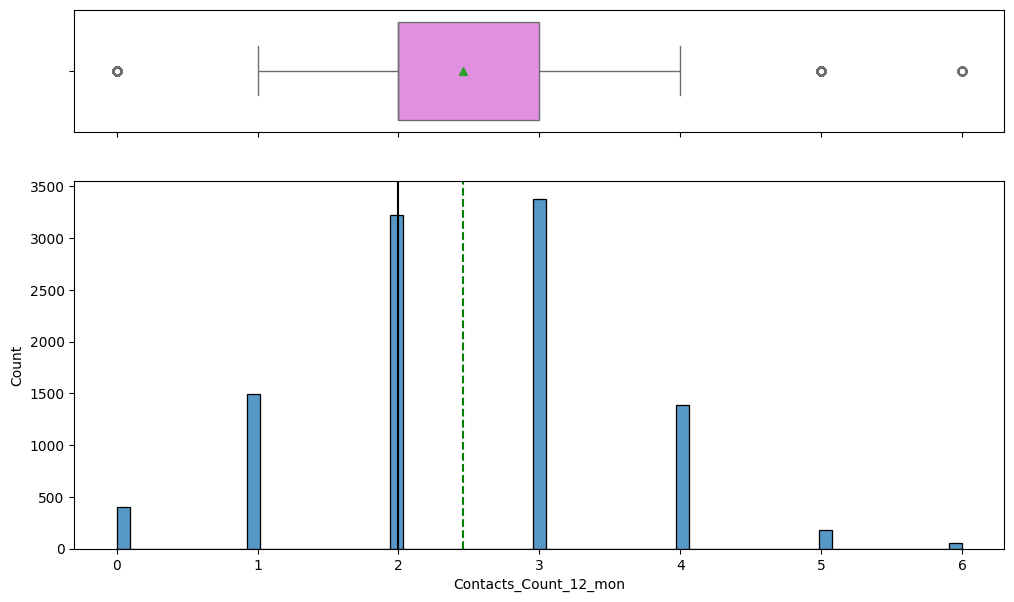

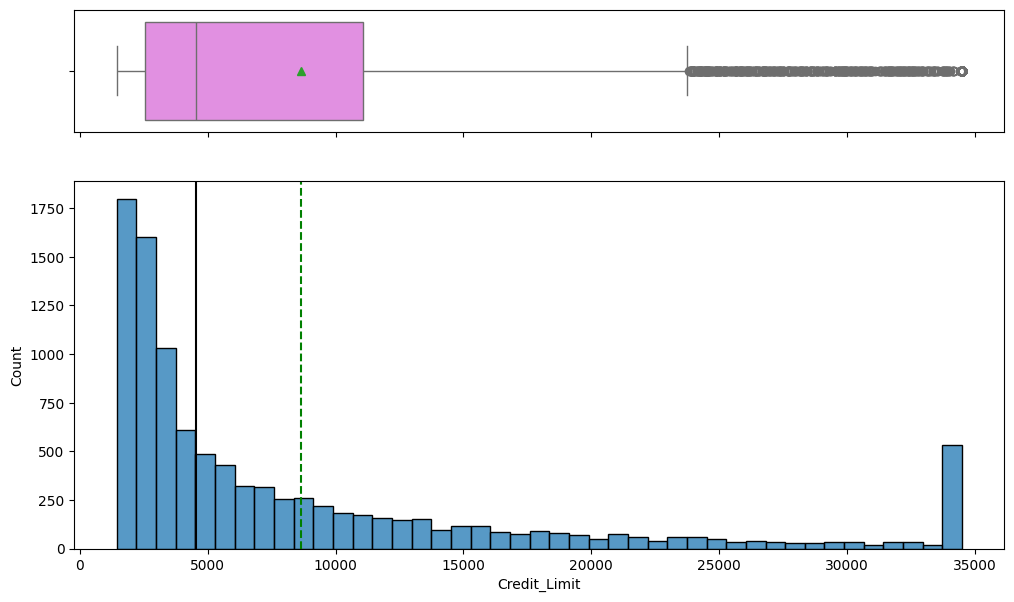

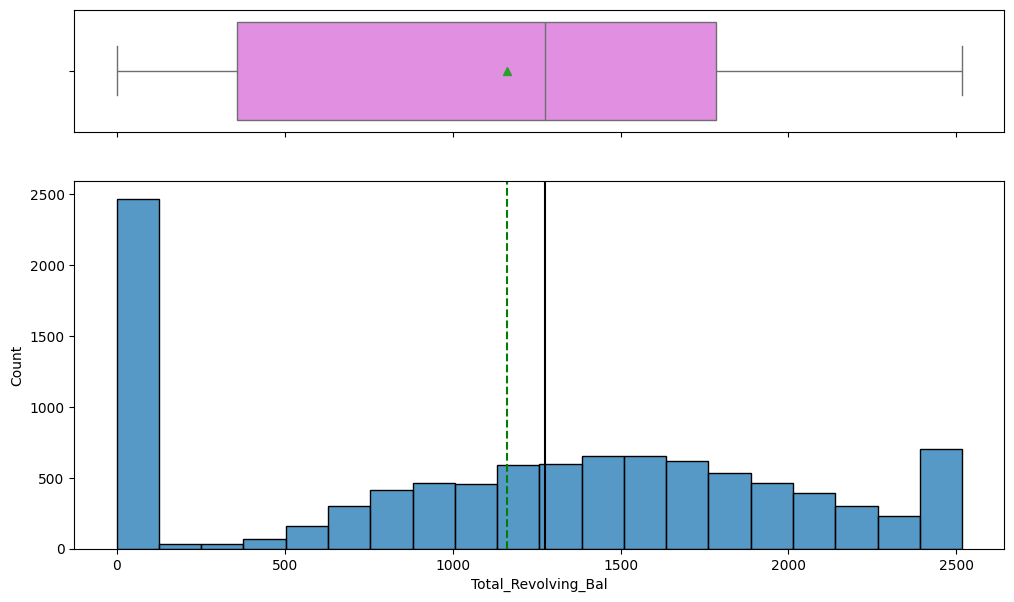

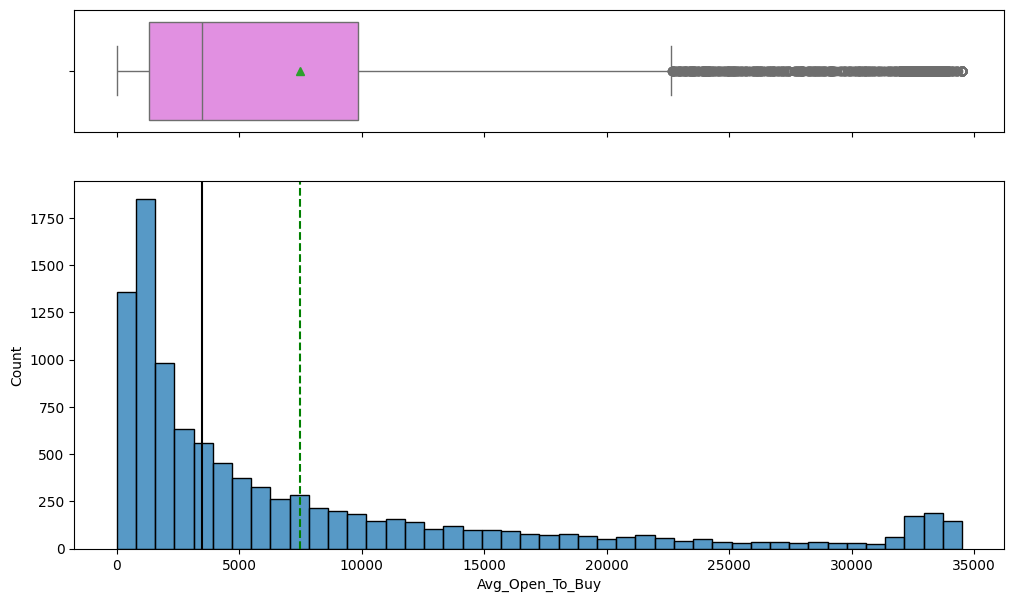

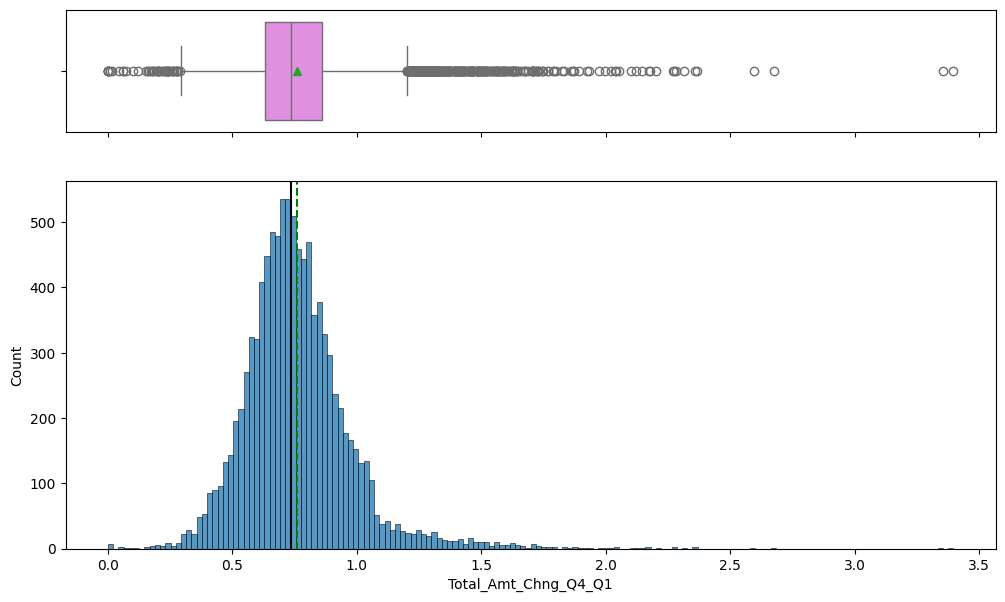

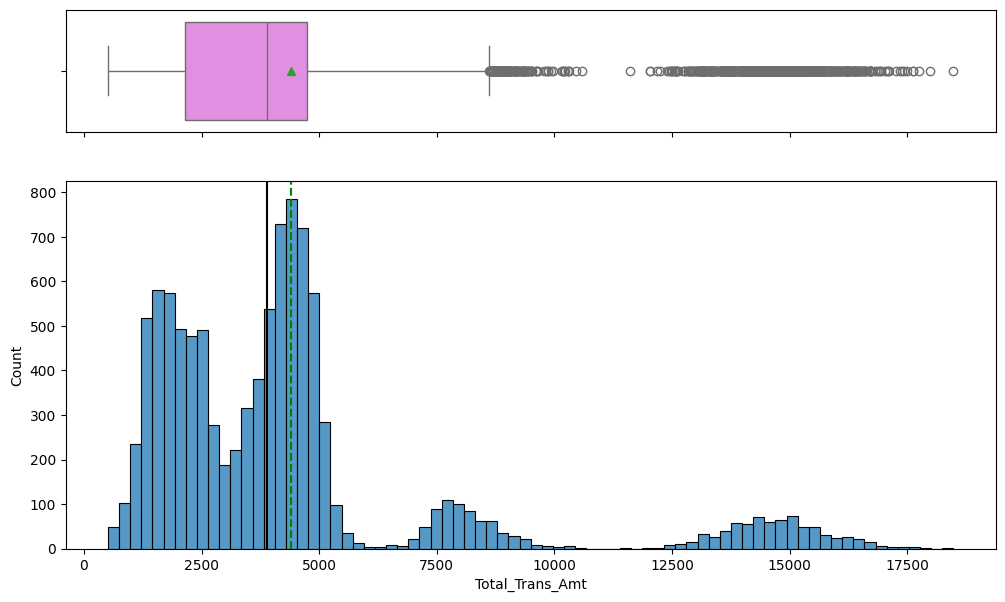

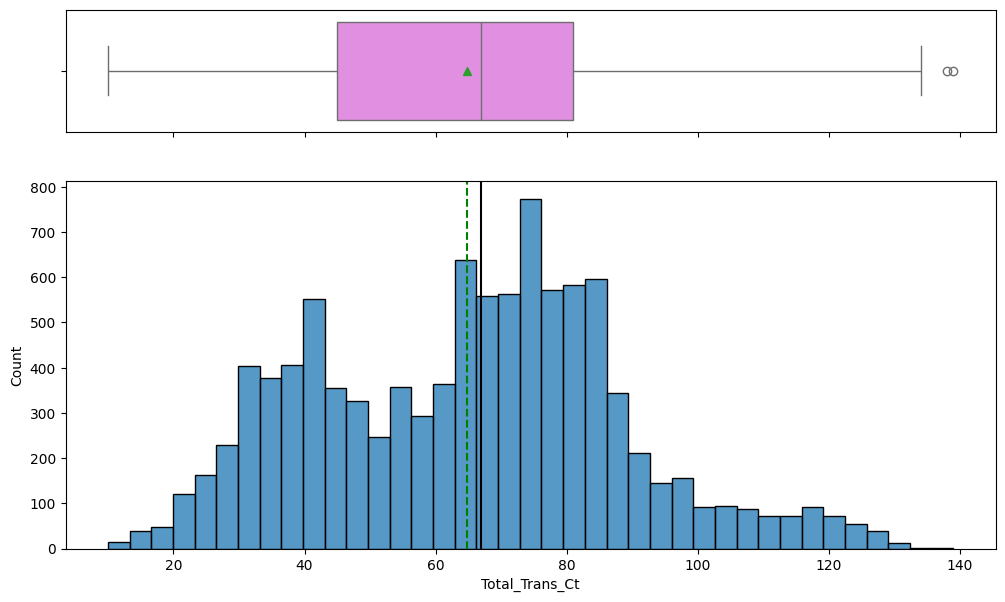

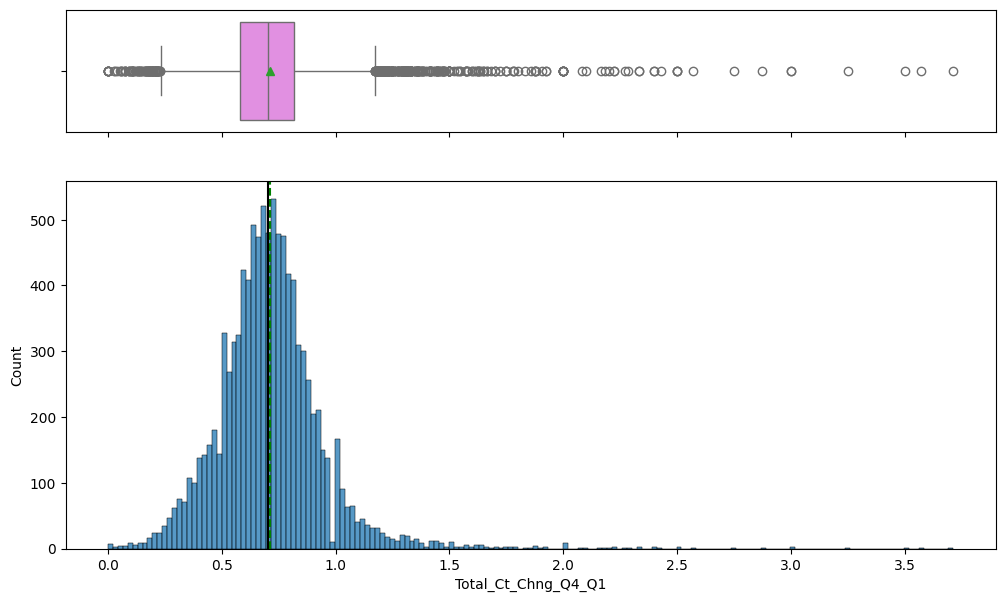

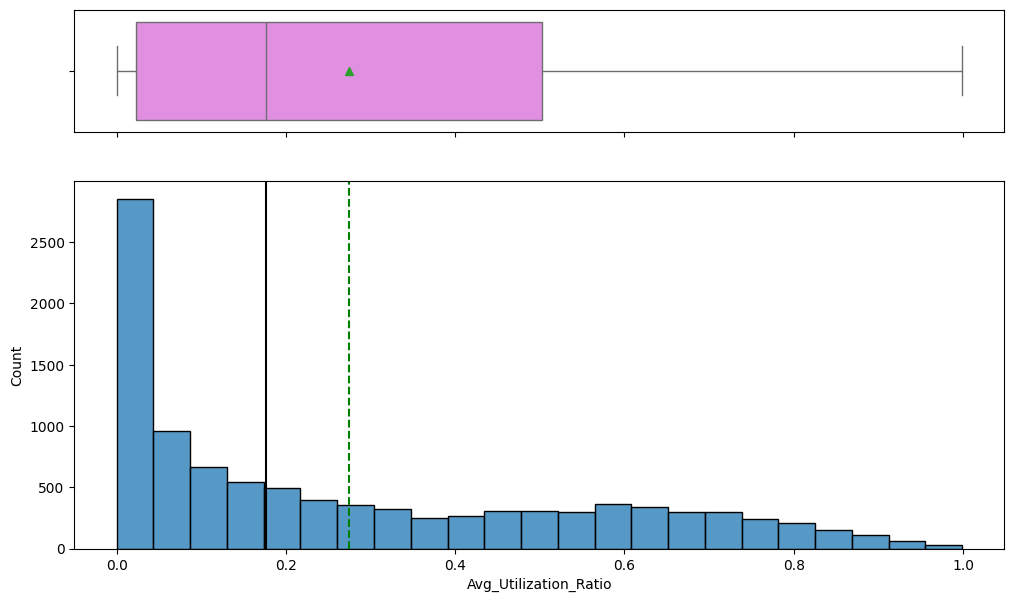

In [17]:
num_cols_list = data.select_dtypes(include=np.number).columns.tolist()
for column in num_cols_list:
    histogram_boxplot(data, column)

### Now, let's build Labeled Barplots for all Object columns

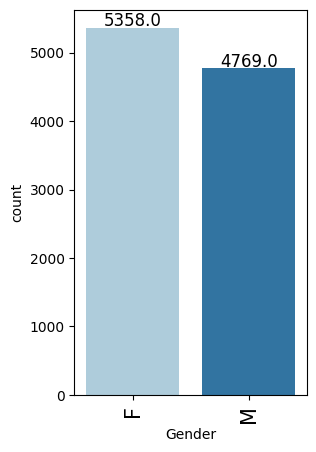

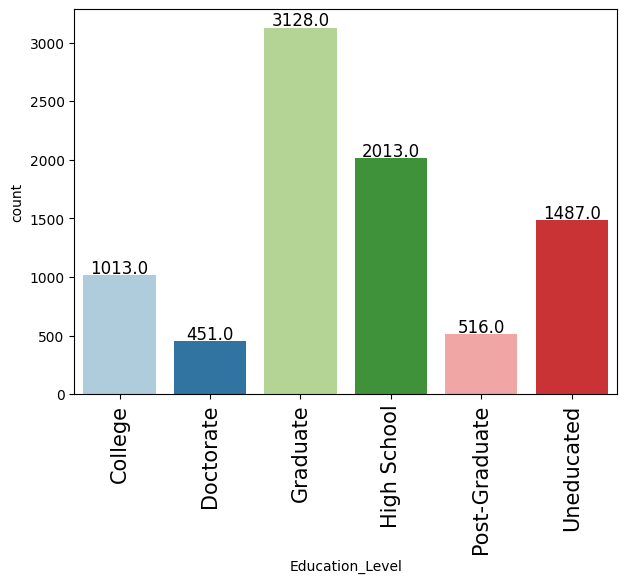

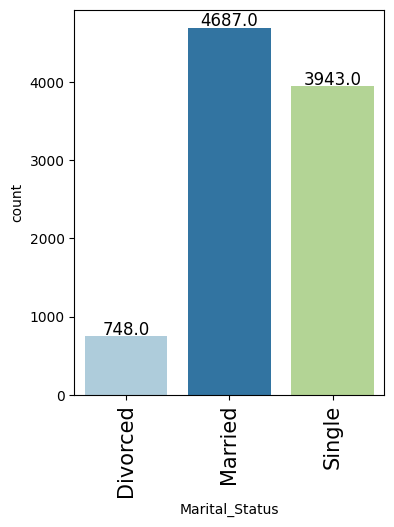

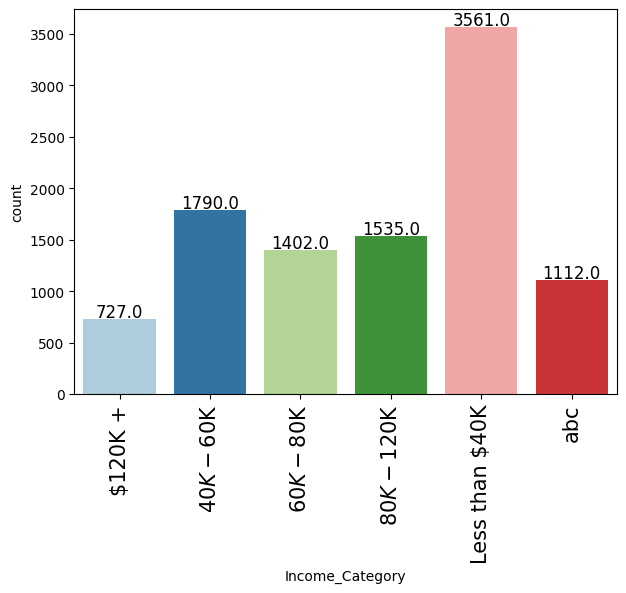

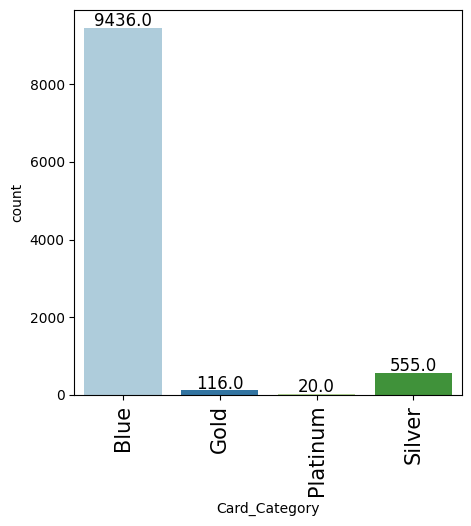

In [18]:
obj_cols_list = data.select_dtypes(include='object').columns.tolist()
for column in obj_cols_list:
    labeled_barplot(data, column)

### Observations on Univariate Analysis
* By looking at the plot for **Attrition_Flag**, we can see that we are dealing with imbalanced dataset, as our target variable has most of its value as ***0***, signifying that they are existing customers, while a small portion of customers have attrited represented by ***1***.
* **Customer_Age** follow a normal distribution. So, there are customers of all ages starting at ***26***, going all the way up to ***73*** which could be outliers as can be seen in the graph, with most customers around age range of ***44*** - ***50***.
* **Dependent_count** also follows a normal distribution with values ranging from ***0*** - ***5***.
* **Months_on_bok** seems to have a few outliers on either sides, primarily because of really high number of customers with around ***35*** months on book.
* **Total_Relationship_Count** also follows a normal distribution with values ranging from ***1*** - ***6***.
* **Months_Inactive_12_mon** & **Contacts_Count_12_mon** also seems to have a few outliers on either side, but not too bad.
* **Credit_Limit** seems to be very highly right-skewed, since most users have low credit limit of ***<5000***, with certain premium customers having credit limit even up to ***~35000***
* **Total_Revolving_Bal** also follows a normal distribution, but has most customers not really revolving much balance and must be settling month on month.
* **Avg_Open_To_Buy**, **Total_Amt_Chng_Q4_Q1** & **Total_Trans_Amt** seems to highly right-skewed as well.
* **Total_Trans_Ct** follows normal distribution.
* **Total_Ct_Chng_Q4_Q1** follows a somewhat normal distribution, however it does have a lot of outliers on either sides.
* **Avg_Utilization_Ratio** seems right skewed as well, but no outliers.
* As can be seen in the **Gender** attribute graph, there are more Female customers than Male customers.
* Highest proportion of customers have the **Education_Level** of ***Graduate***, followed by ***High Schol*** & ***Uneducated***.
* **Income_Category** also seems highly right-skewed, if we sort the plot, with most users having their Income ***Less than 40k*** and a few users that have income higher than ***120k***. We also seem to have numerous customers with their income listed as ***abc***, this would need to be imputed appropriately.
* **Card_Category** also seems highly right-skewed, with most customers having the ***Blue*** card and a limited few customers having premium cards like ***Silver***, ***Gold*** & ***Platinum***.

## Bivariate Analysis

### Let's plot a Heatmap for Numerical Columns to see the Correlations

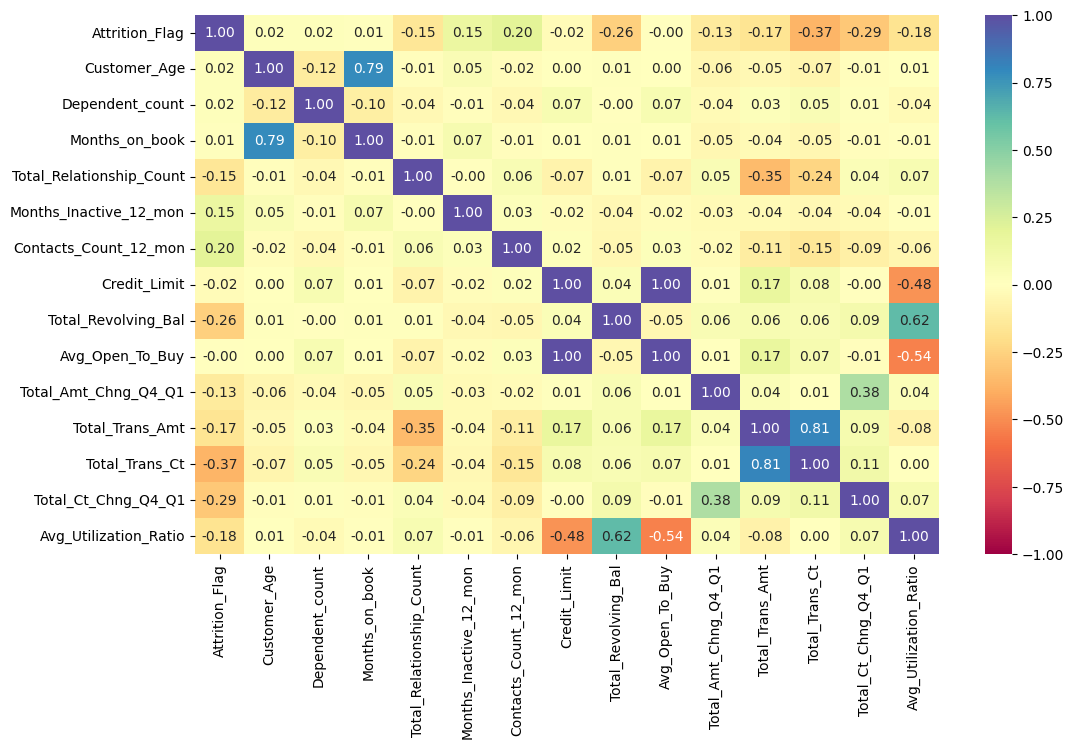

In [19]:
# Let's also perform the Bivariate analysis by plotting Pairplot / Heatmap for the dataframe to show the correlations
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Let's now check how different attributes influence the target variable "Attrition_Flag"

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


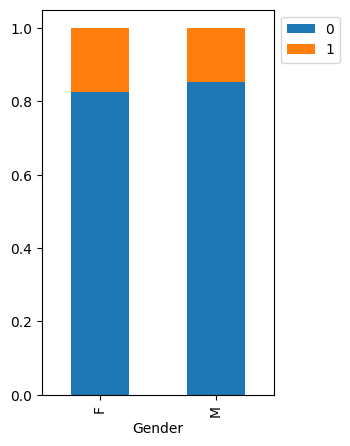

In [20]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


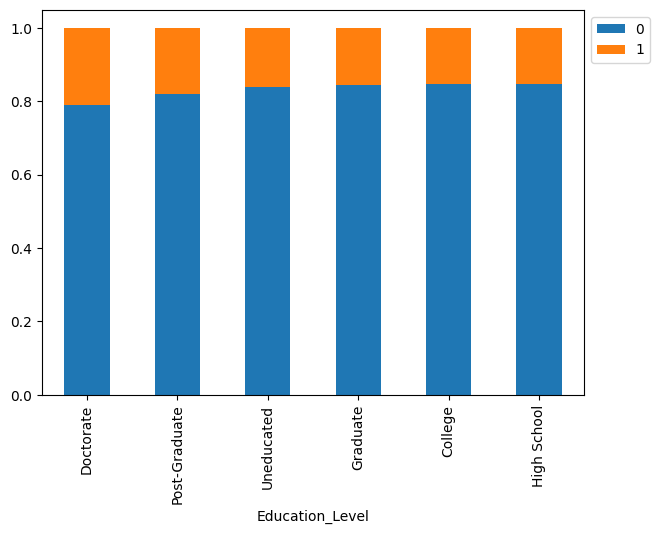

In [21]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


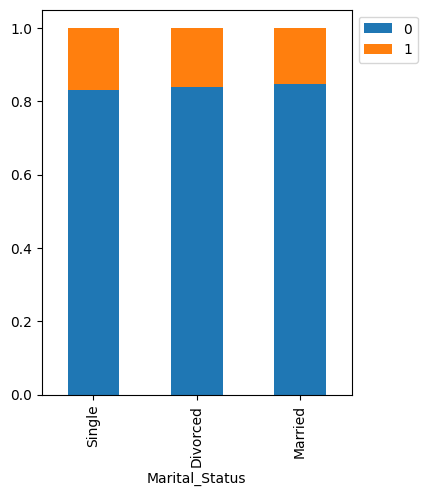

In [22]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


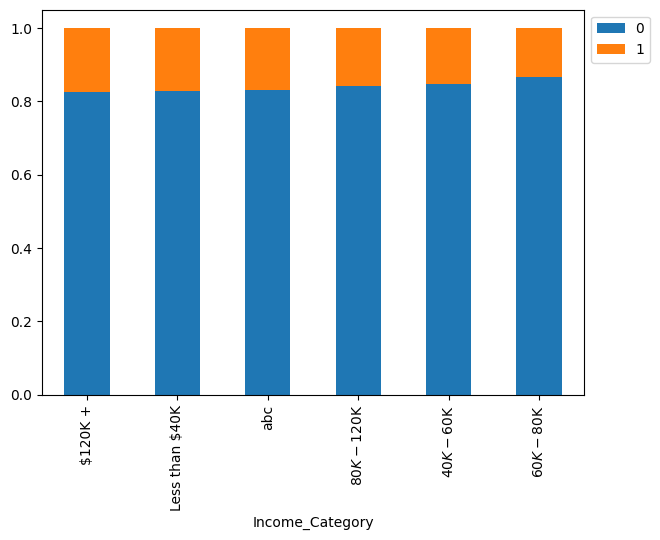

In [23]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


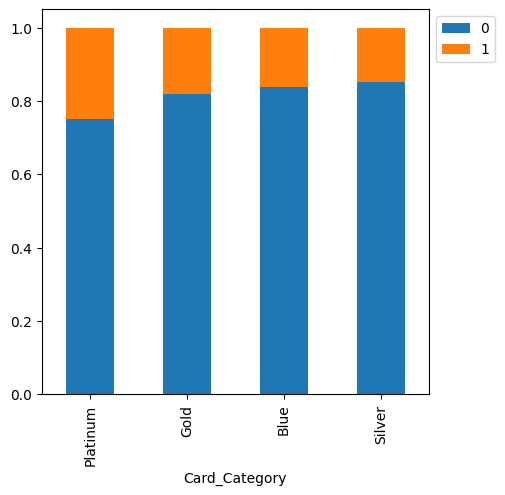

In [24]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


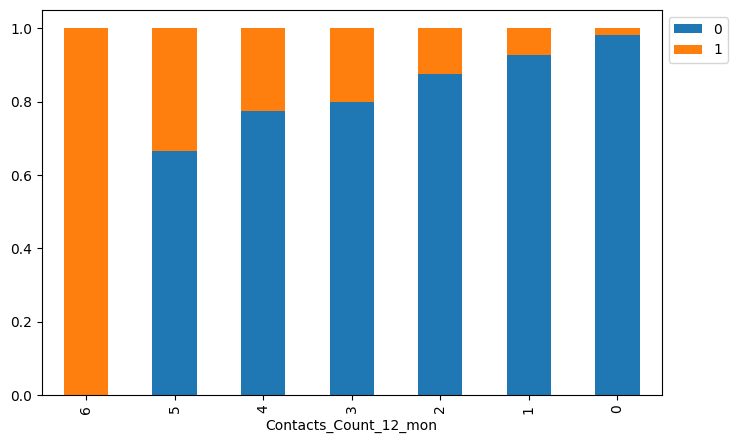

In [25]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


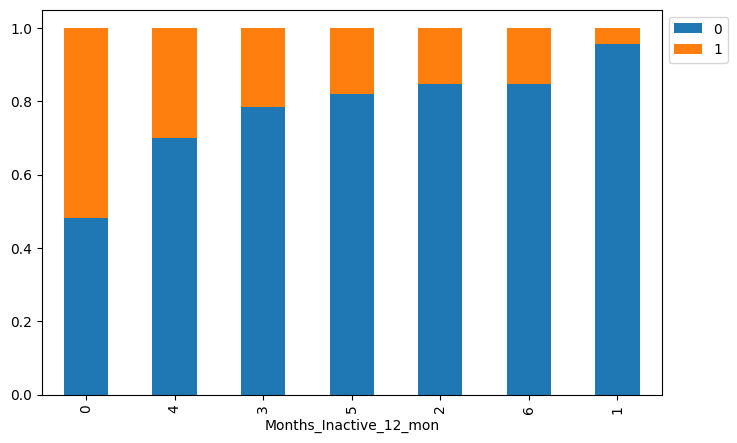

In [26]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


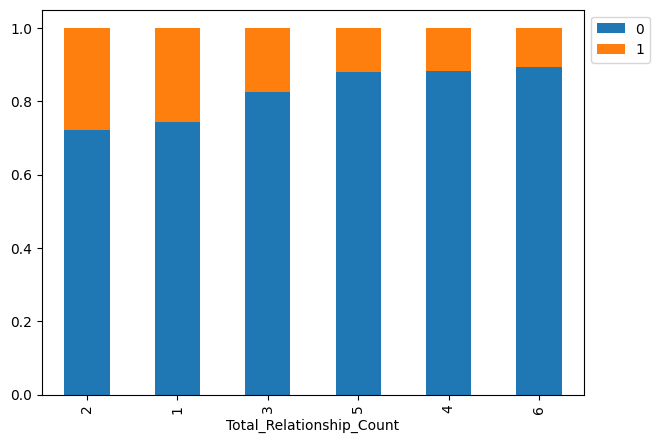

In [27]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


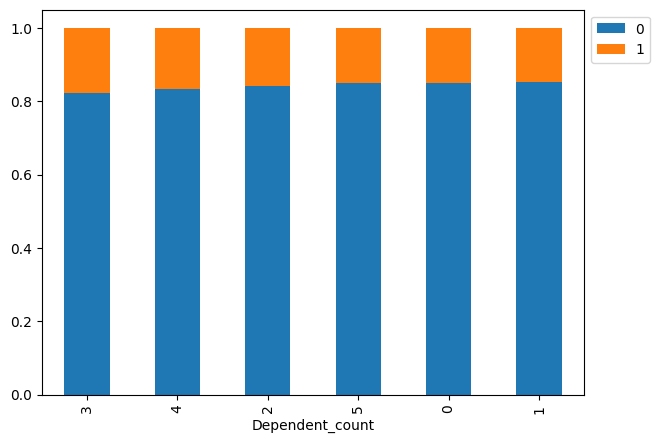

In [28]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

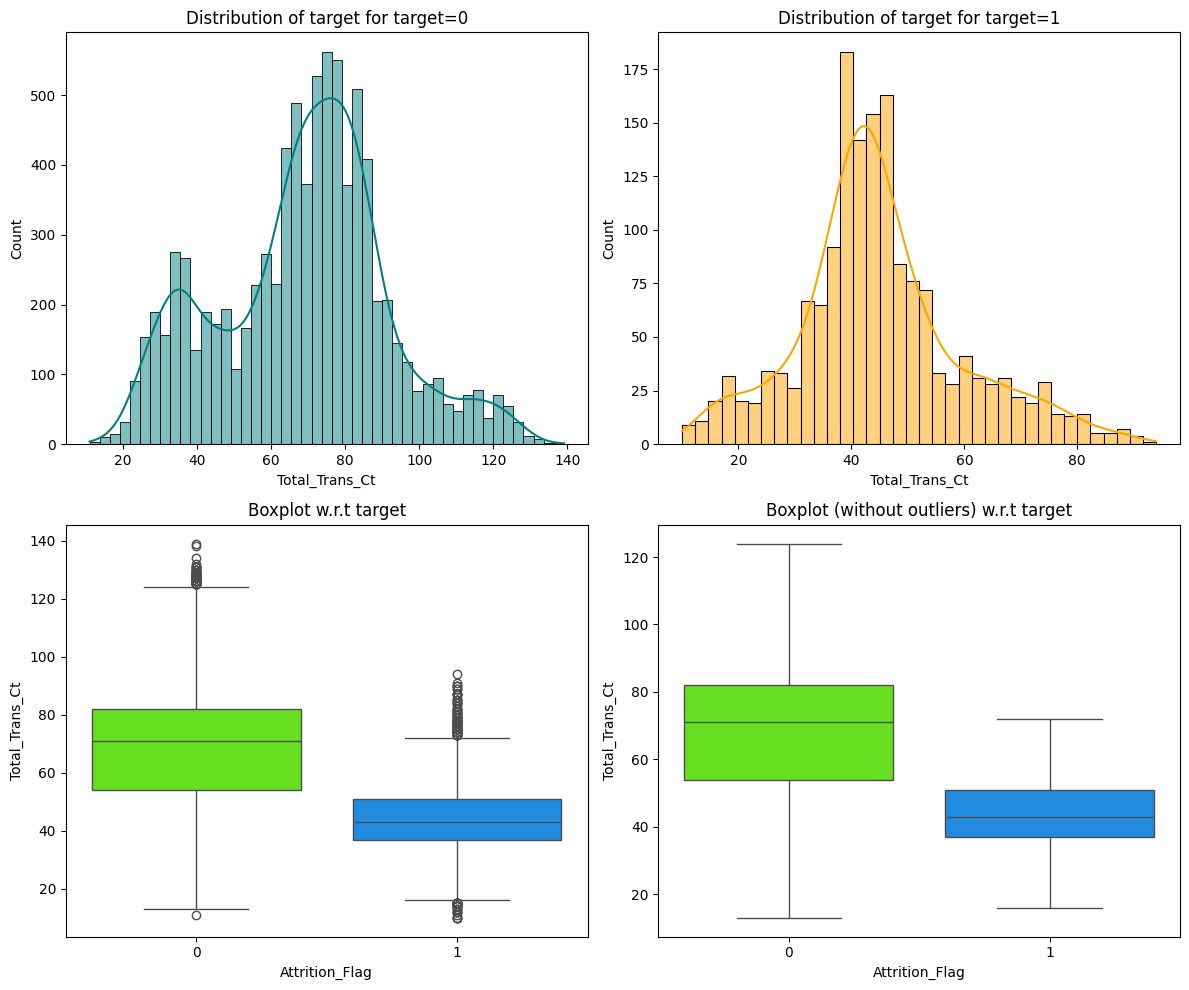

In [29]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

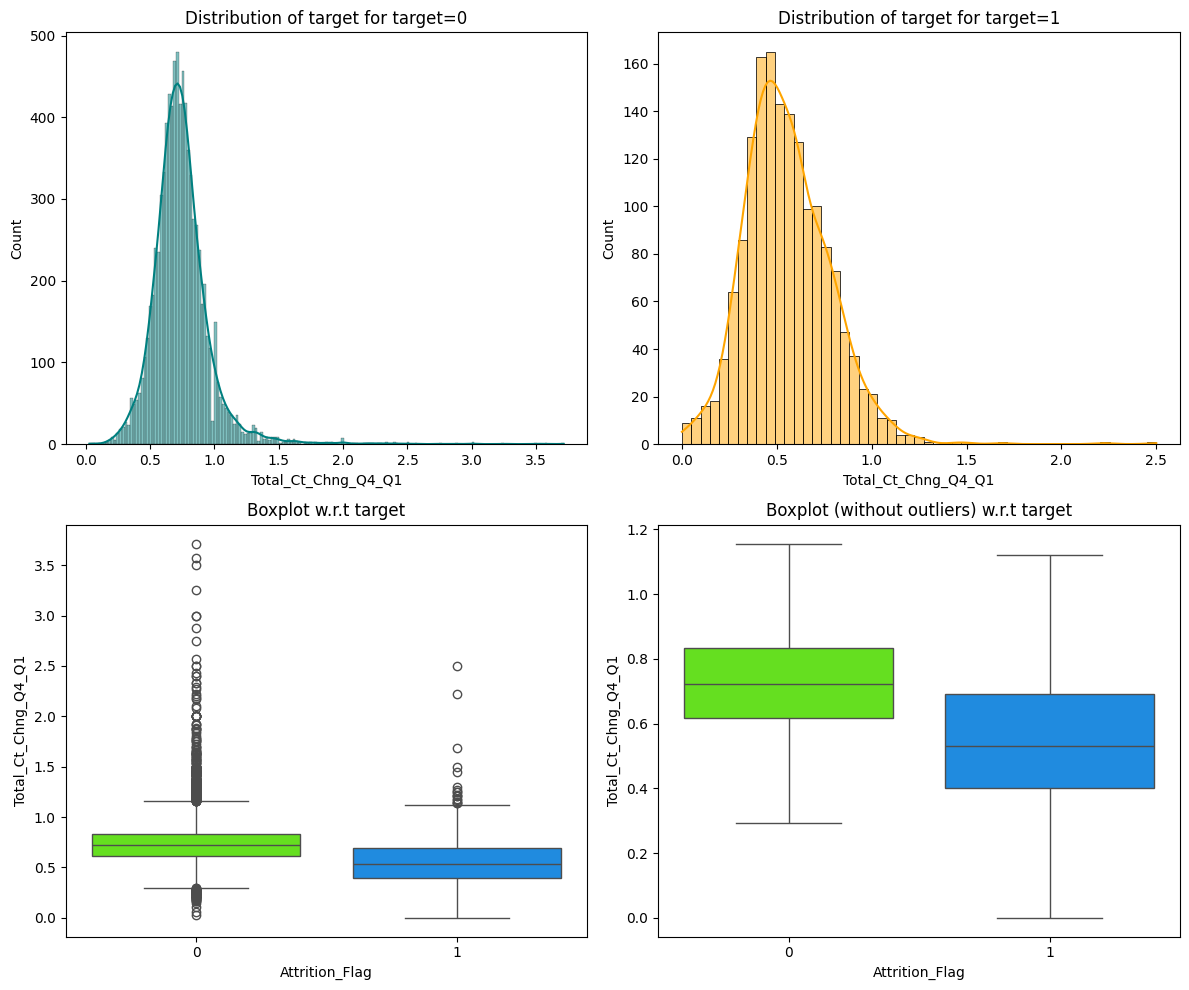

In [30]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

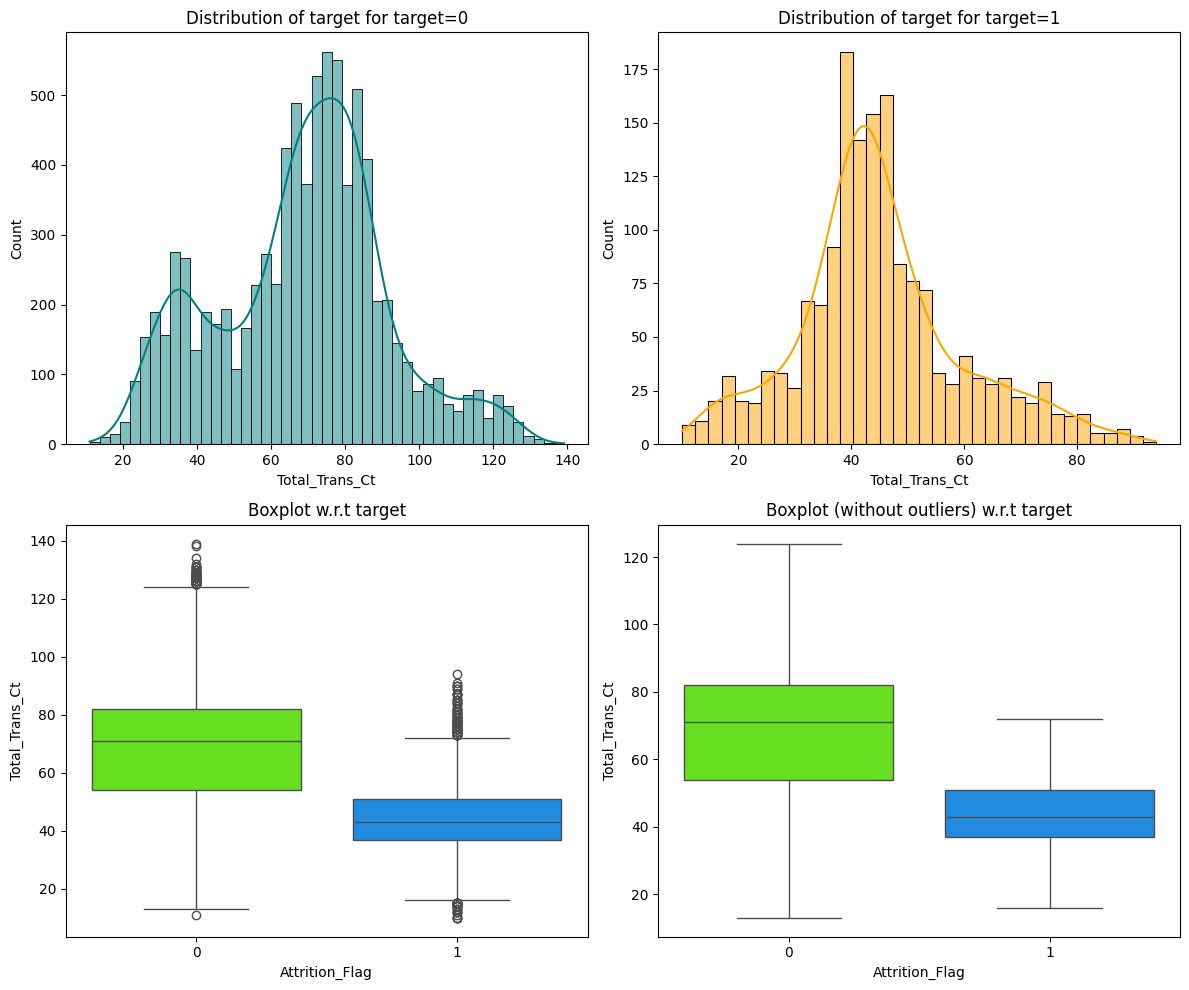

In [31]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

### Observations on Bivariate Analysis

* Following are the top correlations that influences the target variable **Attrition_Flag**
    * Negative Correlation (attributes which when reduced, correlates to increase in attrition)
        * If **Total_Trans_Ct** reduces, then there is a higher chance of Attrition
        * If **Total_Ct_Chng_Q4_Q1** reduces, then there is a higher chance of Attrition
        * If **Total_Revolving_Bal** reduces, then there is a higher chance of Attrition
        * If **Avg_Utilization_Ratio** reduces, then there is a higher chance of Attrition
        * If **Total_Trans_Amt** reduces, then there is a higher chance of Attrition
        * If **Total_Relationship_Count** reduces, then there is a higher chance of Attrition
        * If **Total_Amt_Chng_Q4_Q1** reduces, then there is a higher chance of Attrition
    * Positive Correlation (attributes which when increased, correlates to increase in attrition)
        * If **Contacts_Count_12_mon** increases, then there is a lower chance of Attrition
        * If **Months_Inactive_12_mon** increases, then there is a lower chance of Attrition

* Following are the top correlations in our dataset between the independent variables, as observed from the Heatmap.
    * Full correlation
        * **Avg_Open_To_Buy** & **Credit_Limit** (1 correlation)
    * Positive correlation (in descending order)
        * **Total_Trans_Amt** & **Total_Trans_Ct**
        * **Months_on_book** & **Customer_Age**
        * **Avg_Utilization_Ratio** & **Total_Revolving_Bal**
        * **Total_Amt_Chng_Q4_Q1** & **Total_Ct_Chng_Q4_Q1**
    * Negative correlation (in descending order)
        * **Avg_Utilization_Ratio** & **Avg_Open_To_Buy**
        * **Avg_Utilization_Ratio** & **Credit_Limit**
        * **Total_Trans_Amt** & **Total_Relationship_Count**

## Answers to the Questions above:

1. How is the total transaction amount distributed?
* As we can see from the graph above, Total transaction amount seems to be highly right skewed. As majority of the users have the transaction amount between $1k - $5k. However, there are a few outliers with high transaction amounts upwards of $15k.

2. What is the distribution of the level of education of customers?
* We can see that the data distribution in the **Education_Level** seems to be normal and doesn't follow any particular pattern. Although, we can see that maximum number of customers have their highest education as ***Graduate***, followed by customers having highest education level as ***High School***. However, another interesting observation is that 3rd largest classification in this attribute is for ***Uneducated***.

3. What is the distribution of the level of income of customers?
* If the customers are sorted based on their income to represent the dataset appropriately, then the data distribution would be right skewed, as most of the users have their income ***under 40k***, but there are a few users that have income ***higher than 120k***. We also seem to have numerous customers with their income listed as ***abc***, this would need to be imputed appropriately.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
* **Total_Ct_Chng_Q4_Q1** is negatively correlated to **Attrition_Flag**, which signifies that if a user's number of transactions had dropped from Q4 to Q1, it is a strong sign that the user might attrite shortly and might need to be offered a reason to retain.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
* Although, **Months_Inactive_12_mon** seems to be positively correlated with **Attrition_Flag**, it is a very weak correlation. 

6. What are the attributes that have a strong correlation with each other?
* Following are the top correlations in our dataset.
    * Full correlation
        * **Avg_Open_To_Buy** & **Credit_Limit** (1 correlation)

    * Positive correlation (in descending order)
        * **Total_Trans_Amt** & **Total_Trans_Ct**
        * **Months_on_book** & **Customer_Age**
        * **Avg_Utilization_Ratio** & **Total_Revolving_Bal**
        * **Total_Amt_Chng_Q4_Q1** & **Total_Ct_Chng_Q4_Q1**

    * Negative correlation (in descending order)
        * **Avg_Utilization_Ratio** & **Avg_Open_To_Buy**
        * **Avg_Utilization_Ratio** & **Credit_Limit**
        * **Total_Trans_Ct** & **Attrition_Flag**
        * **Total_Trans_Amt** & **Total_Relationship_Count**
        * **Total_Ct_Chng_Q4_Q1** & **Attrition_Flag**


## Data Pre-processing

### Treating invalid entry in "Income_Category" column

In [32]:
# Let's replace the invalid entry 'abc' with Numpy NaN
data['Income_Category'].replace('abc', np.nan, inplace=True)

In [33]:
# Now that we have imputed invalid entries with null, let's again look at the missing records count.
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Split the Data (Train-Validation-Test)

In [34]:
# separating the independent and dependent variables
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [35]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say train & temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temp set into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(5063, 19) (3038, 19) (2026, 19)


### Imputing Missing Value

#### Now, 3 attributes including "Income_Category" has null values. So, let's create an imputer to treat missing values.

In [36]:
# creating an imputer using the most frequent strategy to impute 
imp_frequent = SimpleImputer(strategy="most_frequent")

In [37]:
# Defining columns which need imputing
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [38]:
# fit the imputer on train data and transform the train data
X_train[reqd_col_for_impute] = imp_frequent.fit_transform(X_train[reqd_col_for_impute])

# transform the validation and test data using the imputer fit on train data
X_val[reqd_col_for_impute] = imp_frequent.transform(X_val[reqd_col_for_impute])
X_test[reqd_col_for_impute] = imp_frequent.transform(X_test[reqd_col_for_impute])

In [39]:
# Ensuring that no columns have any more missing values in train / validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [40]:
# Let's look at the distinct values in each Categorical column or column with Datatype 'object' in Train set
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    2680
M    2383
Name: count, dtype: int64
******************************
Education_Level
Graduate         2358
High School       981
Uneducated        759
College           490
Post-Graduate     248
Doctorate         227
Name: count, dtype: int64
******************************
Marital_Status
Married     2737
Single      1951
Divorced     375
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2365
$40K - $60K        858
$80K - $120K       755
$60K - $80K        720
$120K +            365
Name: count, dtype: int64
******************************
Card_Category
Blue        4725
Silver       271
Gold          58
Platinum       9
Name: count, dtype: int64
******************************


In [41]:
# Let's look at the distinct values in each Categorical column or column with Datatype 'object' in Validation set
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1609
M    1429
Name: count, dtype: int64
******************************
Education_Level
Graduate         1373
High School       624
Uneducated        447
College           305
Post-Graduate     150
Doctorate         139
Name: count, dtype: int64
******************************
Marital_Status
Married     1618
Single      1209
Divorced     211
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    1411
$40K - $60K        544
$80K - $120K       482
$60K - $80K        397
$120K +            204
Name: count, dtype: int64
******************************
Card_Category
Blue        2819
Silver       179
Gold          34
Platinum       6
Name: count, dtype: int64
******************************


In [42]:
# Let's look at the distinct values in each Categorical column or column with Datatype 'object' in Test set
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    2680
M    2383
Name: count, dtype: int64
******************************
Education_Level
Graduate         2358
High School       981
Uneducated        759
College           490
Post-Graduate     248
Doctorate         227
Name: count, dtype: int64
******************************
Marital_Status
Married     2737
Single      1951
Divorced     375
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2365
$40K - $60K        858
$80K - $120K       755
$60K - $80K        720
$120K +            365
Name: count, dtype: int64
******************************
Card_Category
Blue        4725
Silver       271
Gold          58
Platinum       9
Name: count, dtype: int64
******************************


### Create Dummy Variables - One Hot Encoding the Categorical variables

#### Converting Categorical variables in Boolean, for helping with better Classification.

In [43]:
# creating dummy variables
X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X_val = pd.get_dummies(X_val, columns=X_val.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

print(X_train.shape, X_val.shape, X_test.shape)

(5063, 29) (3038, 29) (2026, 29)


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 2327 to 5525
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    5063 non-null   int64  
 1   Dependent_count                 5063 non-null   int64  
 2   Months_on_book                  5063 non-null   int64  
 3   Total_Relationship_Count        5063 non-null   int64  
 4   Months_Inactive_12_mon          5063 non-null   int64  
 5   Contacts_Count_12_mon           5063 non-null   int64  
 6   Credit_Limit                    5063 non-null   float64
 7   Total_Revolving_Bal             5063 non-null   int64  
 8   Avg_Open_To_Buy                 5063 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            5063 non-null   float64
 10  Total_Trans_Amt                 5063 non-null   int64  
 11  Total_Trans_Ct                  5063 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             5063

In [45]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2327,51,1,45,5,2,2,6778.000,865,5913.000,0.992,3158,71,0.775,0.128,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1411,59,0,53,6,1,4,12554.000,2169,10385.000,0.529,1422,30,0.579,0.173,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False
7831,61,1,50,3,3,1,3359.000,1405,1954.000,0.684,4871,79,0.975,0.418,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
6336,43,2,35,5,2,2,1849.000,1293,556.000,0.835,4678,71,0.972,0.699,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False
5020,50,2,35,4,5,3,34516.000,668,33848.000,0.894,3931,77,0.791,0.019,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

### Let's first define what is False Positive & False Negative in this scenario

* **False Positive**
    * If the model predict that the user will attrite, but the user doesn't, then it will be considered False Positive.
* **False Negative**
    * If the model predict that the user will not attrite, but the user does, then it will be considered False Negative.

### What would the Bank want

* If the model predicts False Positives, it wouldn't really impact the Bank, as it will only be a lost effort attempting to retain the customer, while the customer wasn't going to leave anyways.
* However, if the model predicts False Negatives, then it would not attempt to retain a customer that was actually going to attrite, resulting in loss of customer & loss of revenue.
* Hence, ***False Negative would be more expensive*** to the bank and the ***model should try to reduce the False Negatives***.
* So, our metric of choice in this case would be **Recall**.

### Define Functions for Computing Performance & Building Confusion Matrix

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [48]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XG Boost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.974169741697417
Random forest: 1.0
Ada Boost: 0.8610086100861009
Gradient Boost: 0.9052890528905289
XG Boost: 1.0

Validation Performance:

Bagging: 0.7991803278688525
Random forest: 0.7438524590163934
Ada Boost: 0.8299180327868853
Gradient Boost: 0.8258196721311475
XG Boost: 0.875


* Comparing the Recall values for the different models on the ***Original data***, we can see that **XG Boost** model gave the best predictions in the Validation set, with a Recall score of ***87.5***

### Model Building with Oversampled data


In [49]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, count of '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of '1': 813
Before OverSampling, count of '0': 4250 

After OverSampling, count of '1': 4250
After OverSampling, count of '0': 4250 

After OverSampling, the shape of train_X: (8500, 29)
After OverSampling, the shape of train_y: (8500,) 



In [50]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XG Boost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9974117647058823
Random forest: 1.0
Ada Boost: 0.9649411764705882
Gradient Boost: 0.9807058823529412
XG Boost: 1.0

Validation Performance:

Bagging: 0.8565573770491803
Random forest: 0.8217213114754098
Ada Boost: 0.8688524590163934
Gradient Boost: 0.8995901639344263
XG Boost: 0.889344262295082


* However, with ***Oversampled data***, the **Gradient Boost** model surpassed XG Boost model in performance, with highest Recall score of ***89.95***

### Model Building with Undersampled data

In [51]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, count of '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of '1': 813
Before Under Sampling, count of '0': 4250 

After Under Sampling, count of '1': 813
After Under Sampling, count of '0': 813 

After Under Sampling, the shape of train_X: (1626, 29)
After Under Sampling, the shape of train_y: (1626,) 



In [52]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XG Boost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.988929889298893
Random forest: 1.0
Ada Boost: 0.9532595325953259
Gradient Boost: 0.985239852398524
XG Boost: 1.0

Validation Performance:

Bagging: 0.9057377049180327
Random forest: 0.9405737704918032
Ada Boost: 0.9385245901639344
Gradient Boost: 0.9344262295081968
XG Boost: 0.9487704918032787


* With ***Undersampled data***, **XG Boost** again came out on top in terms of the performance, with a Recall score of ***94.87***

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Approach
* As we can see, the untuned models gives a decent performance, but there is definitely scope for tuning.
* First step in the process is to ***identify the best hyperparameter*** in the hyperparameter space, which gives the best performance for each given model.
* Once we have identified the best hyperparameters, we need to then ***Tune the Model***.
* After tuning the model, we will ***fit the model on the original train set***.
    * Check the model performance on original train & val sets
* Then, we will ***fit the model on the Oversampled train set***.
    * Check the model performance on Oversampled train & val sets
* Finally, we will ***fit the model on the Undersampled train set***.
    * Check the model performance on Undersampled train & val sets
* We will repeat these steps for all the different estimators we are using here including:
    * AdaBoost Classifier
    * Gradient Boosting Classifier
    * XGBoost Classifier

#### Identifying best hyperparameters for AdaBoost Classifier for Tuning

In [53]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV to identify the best hyperparameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV on Train data
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8499810649094902:
CPU times: total: 2.08 s
Wall time: 28.7 s


* Here, we can see that **Adaboost classifier** took around ***29 seconds*** to identify the best hyperparameters, which although isn't very expensive, it can get expensive with increased data.
* When we attempt to tune & build more models, we can compare the model complexities based on amount of time taken.

#### Creating tuned AdaBoost Classifier using Original data

In [54]:
# Creating tuned AdaBoost Classifier using identified best hyperparameter
tuned_abc = AdaBoostClassifier( 
    n_estimators=100, 
    learning_rate=0.1, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the tuned AdaBoost Classifier to the original train data.
tuned_abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [55]:
# Checking model's performance on train set
abc_train = model_performance_classification_sklearn(tuned_abc, X_train, y_train)
abc_train

,Accuracy,Recall,Precision,F1
0,0.990,0.954,0.980,0.967


In [56]:
# Checking model's performance on validation set
abc_val =  model_performance_classification_sklearn(tuned_abc, X_val, y_val)
abc_val

,Accuracy,Recall,Precision,F1
0,0.962,0.828,0.931,0.876


#### Creating tuned AdaBoost Classifier using Oversampled data

In [57]:
# Creating tuned AdaBoost Classifier using identified best hyperparameter
tuned_abc_over = AdaBoostClassifier( 
    n_estimators=100, 
    learning_rate=0.1, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the tuned AdaBoost Classifier to the oversampled train data.
tuned_abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [58]:
# Checking model's performance on train set
abc_train_over = model_performance_classification_sklearn(tuned_abc_over, X_train_over, y_train_over)
abc_train_over

,Accuracy,Recall,Precision,F1
0,0.987,0.988,0.986,0.987


In [59]:
# Checking model's performance on validation set
abc_val_over =  model_performance_classification_sklearn(tuned_abc_over, X_val, y_val)
abc_val_over

,Accuracy,Recall,Precision,F1
0,0.961,0.881,0.876,0.878


#### Creating tuned AdaBoost Classifier using Undersampled data

In [60]:
# Creating tuned AdaBoost Classifier using identified best hyperparameter
tuned_abc_un = AdaBoostClassifier( 
    n_estimators=100, 
    learning_rate=0.1, 
    estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the tuned AdaBoost Classifier to the undersampled train data.
tuned_abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [61]:
# Checking model's performance on train set
abc_train_un = model_performance_classification_sklearn(tuned_abc_un, X_train_un, y_train_un)
abc_train_un

,Accuracy,Recall,Precision,F1
0,0.997,0.998,0.996,0.997


In [62]:
# Checking model's performance on validation set
abc_val_un =  model_performance_classification_sklearn(tuned_abc_un, X_val, y_val)
abc_val_un

,Accuracy,Recall,Precision,F1
0,0.940,0.928,0.754,0.832


#### Identifying best hyperparameters for Gradient Boosting Classifier for Tuning

In [63]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [GradientBoostingClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV to identify the best hyperparameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

# Fitting parameters in RandomizedSearchCV on Train data
randomized_cv.fit(X_train, y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': GradientBoostingClassifier(random_state=1)} with CV score=0.8647655835794895:
CPU times: total: 3.33 s
Wall time: 1min 6s


* **Gradient Boosting** model tuning seems to be way more expensive than the AdaBoost Classifier tuning, by taking around ***66 seconds*** to identify the best hyperparameters.

#### Creating tuned Gradient Boosting Classifier using Original data

In [64]:
# Creating tuned Gradient Boosting Classifier using identified best hyperparameter
tuned_gbc = GradientBoostingClassifier( 
    subsample=0.9,
    max_features=0.5,
    n_estimators=100, 
    learning_rate=0.1, 
    init=GradientBoostingClassifier(random_state=1)
)

# Fit the tuned Gradient Boosting Classifier to the original train data.
tuned_gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=GradientBoostingClassifier(random_state=1),
                           max_features=0.5, subsample=0.9)

In [65]:
# Checking model's performance on train set
gbc_train = model_performance_classification_sklearn(tuned_gbc, X_train, y_train)
gbc_train

,Accuracy,Recall,Precision,F1
0,0.989,0.950,0.983,0.966


In [66]:
# Checking model's performance on validation set
gbc_val =  model_performance_classification_sklearn(tuned_gbc, X_val, y_val)
gbc_val

,Accuracy,Recall,Precision,F1
0,0.966,0.859,0.927,0.891


#### Creating tuned Gradient Boosting Classifier using Oversampled data

In [67]:
# Creating tuned Gradient Boosting Classifier using identified best hyperparameter
tuned_gbc_over = GradientBoostingClassifier( 
    subsample=0.9,
    max_features=0.5,
    n_estimators=100, 
    learning_rate=0.1, 
    init=GradientBoostingClassifier(random_state=1)
)

# Fit the tuned Gradient Boosting Classifier to the oversampled train data.
tuned_gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=GradientBoostingClassifier(random_state=1),
                           max_features=0.5, subsample=0.9)

In [68]:
# Checking model's performance on train set
gbc_train_over = model_performance_classification_sklearn(tuned_gbc_over, X_train_over, y_train_over)
gbc_train_over

,Accuracy,Recall,Precision,F1
0,0.988,0.990,0.987,0.988


In [69]:
# Checking model's performance on validation set
gbc_val_over =  model_performance_classification_sklearn(tuned_gbc_over, X_val, y_val)
gbc_val_over

,Accuracy,Recall,Precision,F1
0,0.960,0.883,0.871,0.877


#### Creating tuned Gradient Boosting Classifier using Undersampled data

In [70]:
# Creating tuned Gradient Boosting Classifier using identified best hyperparameter
tuned_gbc_un = GradientBoostingClassifier( 
    subsample=0.9,
    max_features=0.5,
    n_estimators=100, 
    learning_rate=0.1, 
    init=GradientBoostingClassifier(random_state=1)
)

# Fit the tuned Gradient Boosting Classifier to the undersampled train data.
tuned_gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=GradientBoostingClassifier(random_state=1),
                           max_features=0.5, subsample=0.9)

In [71]:
# Checking model's performance on train set
gbc_train_un = model_performance_classification_sklearn(tuned_gbc_un, X_train_un, y_train_un)
gbc_train_un

,Accuracy,Recall,Precision,F1
0,0.998,0.998,0.998,0.998


In [72]:
# Checking model's performance on validation set
gbc_val_un =  model_performance_classification_sklearn(tuned_gbc_un, X_val, y_val)
gbc_val_un

,Accuracy,Recall,Precision,F1
0,0.951,0.949,0.790,0.862


#### Identifying best hyperparameters for XGBoost Classifier for Tuning

In [73]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV to identify the best hyperparameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV on Train data
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9151859425888057:
CPU times: total: 2.72 s
Wall time: 16.2 s


* **XG Boost** seems to be the best among the lot, by identifying the best hyperparameters required for tuning within ***around 16 seconds***.

#### Creating tuned XGBoost Classifier using Original data

In [74]:
# Creating tuned XGBoost Classifier using identified best hyperparameter
tuned_xgb = XGBClassifier( 
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3
)

# Fit the tuned XGBoost Classifier to the original train data.
tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
# Checking model's performance on train set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.989,0.999,0.934,0.966


In [76]:
# Checking model's performance on validation set
xgb_val =  model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.965,0.920,0.868,0.894


#### Creating tuned XGBoost Classifier using Oversampled data

In [77]:
# Creating tuned XGBoost Classifier using identified best hyperparameter
tuned_xgb_over = XGBClassifier( 
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3
)

# Fit the tuned XGBoost Classifier to the oversampled train data.
tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
# Checking model's performance on train set
xgb_train_over = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
xgb_train_over

,Accuracy,Recall,Precision,F1
0,0.990,1.000,0.980,0.990


In [79]:
# Checking model's performance on validation set
xgb_val_over =  model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgb_val_over

,Accuracy,Recall,Precision,F1
0,0.955,0.928,0.816,0.869


#### Creating tuned XGBoost Classifier using Undersampled data

In [80]:
# Creating tuned XGBoost Classifier using identified best hyperparameter
tuned_xgb_un = XGBClassifier( 
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3
)

# Fit the tuned XGBoost Classifier to the undersampled train data.
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
# Checking model's performance on train set
xgb_train_un = model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
xgb_train_un

,Accuracy,Recall,Precision,F1
0,0.974,1.000,0.950,0.974


In [82]:
# Checking model's performance on validation set
xgb_val_un =  model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
xgb_val_un

,Accuracy,Recall,Precision,F1
0,0.914,0.975,0.657,0.785


## Model Comparison and Final Model Selection

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        abc_train.T,
        abc_train_over.T,
        abc_train_un.T,
        gbc_train.T,
        gbc_train_over.T,
        gbc_train_un.T,
        xgb_train.T,
        xgb_train_over.T,
        xgb_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost (Original Train Set)",
    "Adaboost (Oversampled Train Set)",
    "Adaboost (Undersampled Train Set)",
    "Gradient Boost (Original Train Set)",
    "Gradient Boost (Oversampled Train Set)",
    "Gradient Boost (Undersampled Train Set)",
    "XG Boost (Original Train Set)",
    "XG Boost (Oversampled Train Set)",
    "XG Boost (Undersampled Train Set)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Adaboost (Original Train Set),Adaboost (Oversampled Train Set),Adaboost (Undersampled Train Set),Gradient Boost (Original Train Set),Gradient Boost (Oversampled Train Set),Gradient Boost (Undersampled Train Set),XG Boost (Original Train Set),XG Boost (Oversampled Train Set),XG Boost (Undersampled Train Set)
Accuracy,0.990,0.987,0.997,0.989,0.988,0.998,0.989,0.990,0.974
Recall,0.954,0.988,0.998,0.950,0.990,0.998,0.999,1.000,1.000
Precision,0.980,0.986,0.996,0.983,0.987,0.998,0.934,0.980,0.950
F1,0.967,0.987,0.997,0.966,0.988,0.998,0.966,0.990,0.974


In [84]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        abc_val.T,
        abc_val_over.T,
        abc_val_un.T,
        gbc_val.T,
        gbc_val_over.T,
        gbc_val_un.T,
        xgb_val.T,
        xgb_val_over.T,
        xgb_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Adaboost (Original Val Set)",
    "Adaboost (Oversampled Val Set)",
    "Adaboost (Undersampled Val Set)",
    "Gradient Boost (Original Val Set)",
    "Gradient Boost (Oversampled Val Set)",
    "Gradient Boost (Undersampled Val Set)",
    "XG Boost (Original Val Set)",
    "XG Boost (Oversampled Val Set)",
    "XG Boost (Undersampled Val Set)",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Adaboost (Original Val Set),Adaboost (Oversampled Val Set),Adaboost (Undersampled Val Set),Gradient Boost (Original Val Set),Gradient Boost (Oversampled Val Set),Gradient Boost (Undersampled Val Set),XG Boost (Original Val Set),XG Boost (Oversampled Val Set),XG Boost (Undersampled Val Set)
Accuracy,0.962,0.961,0.940,0.966,0.960,0.951,0.965,0.955,0.914
Recall,0.828,0.881,0.928,0.859,0.883,0.949,0.920,0.928,0.975
Precision,0.931,0.876,0.754,0.927,0.871,0.790,0.868,0.816,0.657
F1,0.876,0.878,0.832,0.891,0.877,0.862,0.894,0.869,0.785


* Upon looking at the **Recall scores** for different models we built using original, oversampled & undersampled Validation sets, we can clearly see that **XG Boost model fit on undersampled train set**, seems to be performing the ***best*** with highest Recall score of ***97.5%***.
* Another reason to prefer XG Boost is because we had noticed earlier that the XG Boost model is computationally least complex and was much quicker than others.
* However, we can see that the **Precision score** for this model isn't great and is at mid-60s. But, that shouldn't stop the Thera Bank from using this model, because the only thing this model wouldn't be good at would be to identify False Positives, because the only loss in this case for the Bank is that there would be an unnecessary offer being extended to the customer, which in fact will, unknowingly improve customer experience, which couldn't hurt.
* So, **the Final selected model with best intended performance is XG Boost on Undersampled set**.

### Test set final performance

In [85]:
# Checking Best Model's (XG Boost on Undersampled data) performance on Unseen Test set
xgb_test_un =  model_performance_classification_sklearn(tuned_xgb_un, X_test, y_test)
xgb_test_un

,Accuracy,Recall,Precision,F1
0,0.904,0.972,0.630,0.765


* We can see that the **final Recall Score** for our selected model on Unseen Test data is **over 97%**, which is pretty good.

### Feature Importances

* Let's now look at which features had the highest importance during model building.

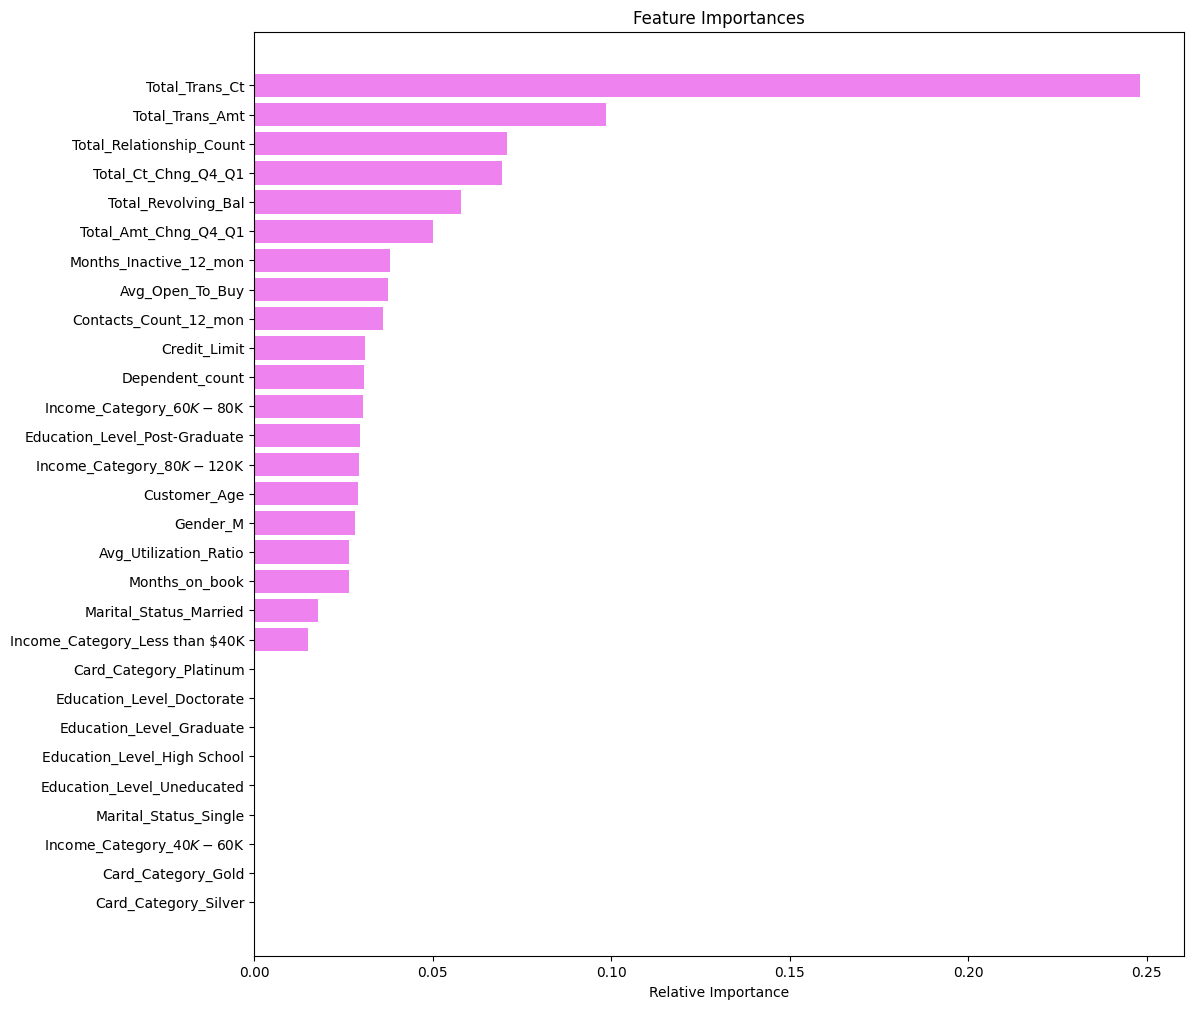

In [86]:
feature_names = X_train.columns
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

* **Thera Bank** should utilize the **XG Boost Model trained on Undersampled Train set** to predict the ***Credit Card Users Churn Prediction***, because this model will perform best to identify Users that are actually going to churn, while making some incorrect predictions in identifying users as churning, while the user was going to retain, but this must acceptable for the Bank given the loss margin.
* **Thera Bank** should devise schemes to attract the users into staying back, that might have churned if no action was taken. These schemes could include:
    * 0% APR for next 12 months.
    * Offering free airline miles through a vesting process, so that the users have to stay longer to avail the benefits.
    * Perk point programs to offer multi-fold points on purchases, which can later be redeemed for multiple options including cashback.
* More such schemes or offers can be curated to lure the customer into staying back for longer and thereby increasing the Bank's revenue.
* The Bank must also invest into maturing the models as the time passes, so as to get more reliable predictions resulting in better churning user retention.

***